In [1]:
import sys  ###fastslam1
sys.path.append('../scripts/')
from kf import *

In [2]:
class FastSlam(Mcl):
    def __init__(self, envmap, init_pose, particle_num, landmark_num, motion_noise_stds={"nn":0.19, "no":0.001, "on":0.13, "oo":0.2}, \
                 distance_dev_rate=0.14, direction_dev=0.05): #envmapとlandmark_numを入れ替え
        super().__init__(envmap, init_pose, particle_num, motion_noise_stds, distance_dev_rate, direction_dev)

<IPython.core.display.Javascript object>


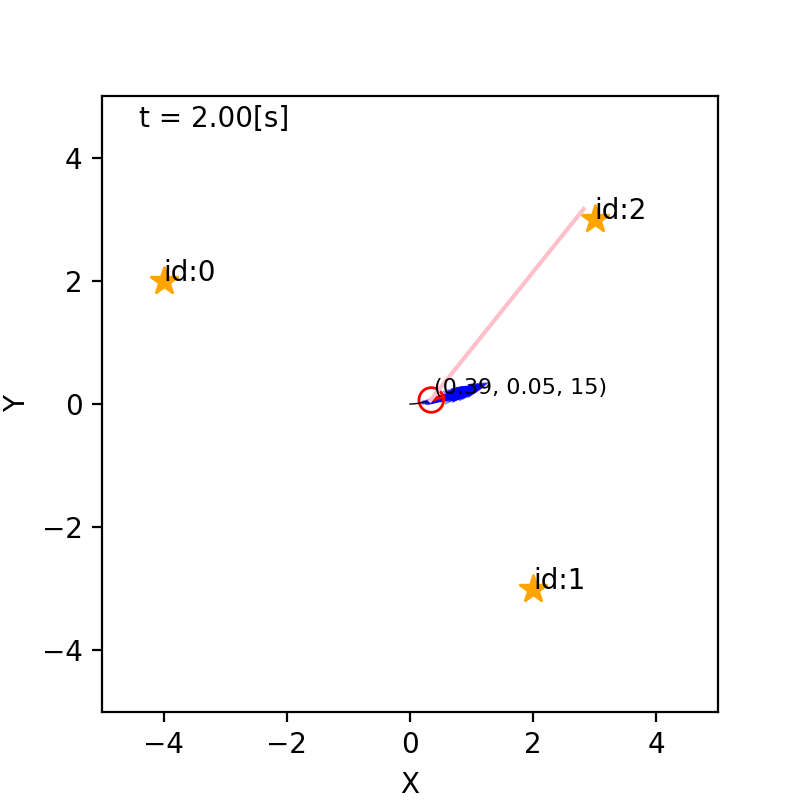

In [3]:
def trial(): ###fastslam1fsa
    time_interval = 0.1
    world = World(30, time_interval, debug=False) 

    ##真の地図を作成##
    m = Map()
    for ln in [(-4,2), (2,-3), (3,3)]: m.append_landmark(Landmark(*ln))
    world.append(m)

    ## ロボットを作る ##
    init_pose = np.array([0,0,0]).T
    pf = FastSlam(m, init_pose, 100, len(m.landmarks))                    #クラスをFastSlamに
    a = EstimationAgent(time_interval, 0.2, 10.0/180*math.pi, pf)
    r = Robot(init_pose, sensor=Camera(m), agent=a, color="red")
    world.append(r)

    world.draw()
    
trial()